In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Problem 1 : Integration: Trapezoid and Midpoint ###



The exact value of the integral is 2.328423e-01
With 50 partitions:
The midpoint estimate is 2.327178e-01
The Trapezoid estimate is 2.334008e-01


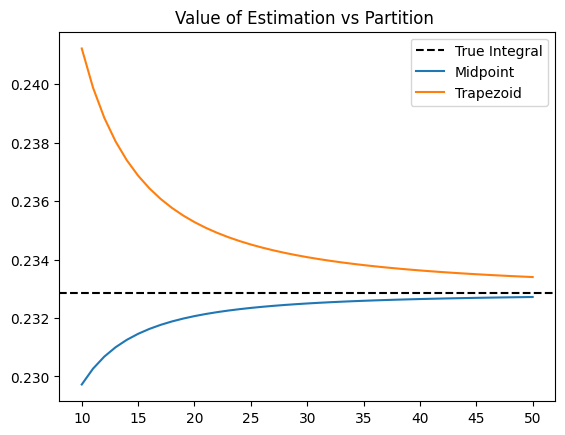

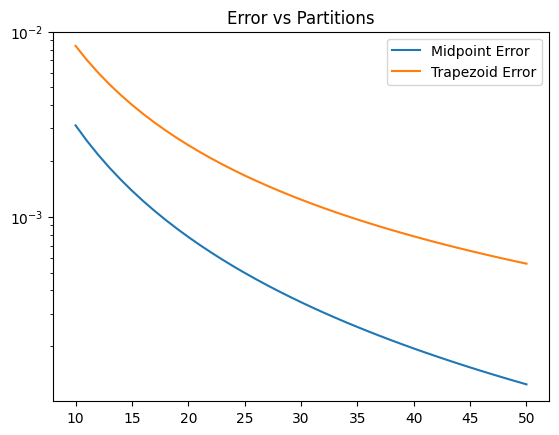

In [3]:
def f(x):
    return np.cos(2*x)*np.exp(-3*x)

def midpoint(f, n, a, b):
    #f: function 
    #n: # of partitions
    #a, b: bounds 

    sum = 0
    x = np.linspace(a, b, n+1)
    # h = x[1]-x[0]
    h = (b-a)/n

    for i in range(n):
        sum += f((x[i]+x[i+1]) / 2)

    return sum * h

def trapezoid(f, n, a, b):
    #f: function 
    #n: # of partitions
    #a, b: bounds 

    x = np.linspace(a, b, n+1)
    sum = f(x[0])+f(x[-1])
    h = (b-a)/n

    for i in range(1,n-1):
        sum += 2*f((x[i]))
    
    return (h/2)*sum 

def partvsval(Iestimator):
    numParts = np.linspace(10,50, 41)
    estimates = []

    for bins in range(10,51):
        estimates.append(Iestimator(f, bins, 0, np.pi/2))

    return (numParts, estimates)


exactI = (3/13)*(1+np.exp(-3*np.pi/2))

midData = partvsval(midpoint)
trapData = partvsval(trapezoid)

bins = midData[0]

print(f'The exact value of the integral is {exactI:.6e}')
print(f'With {bins[-1]:.0f} partitions:')
print(f'The midpoint estimate is {midData[1][-1]:.6e}')
print(f'The Trapezoid estimate is {trapData[1][-1]:.6e}')



plt.axhline(y = exactI, label = 'True Integral', color = 'black', linestyle = 'dashed')
plt.plot(midData[0], midData[1], label = 'Midpoint')
plt.plot(trapData[0], trapData[1], label = 'Trapezoid')
plt.title('Value of Estimation vs Partition ')
plt.legend()
plt.show()
# # estI = midpoint(f, 10, 0, np.pi/2)

midPointErr = []
trapErr = []

for i in range(len(midData[1])):
    midPointErr.append(abs(exactI-midData[1][i]))
    trapErr.append(abs(exactI - trapData[1][i]))

plt.semilogy(bins, midPointErr, label= 'Midpoint Error')
plt.semilogy(bins, trapErr, label = 'Trapezoid Error')
plt.ylim(top = 1e-2)
plt.title('Error vs Partitions')
plt.legend()
plt.show()

### Problem 2: Integration: Gauss-Legendre ###

### Problem 3: ODE: Euler ###

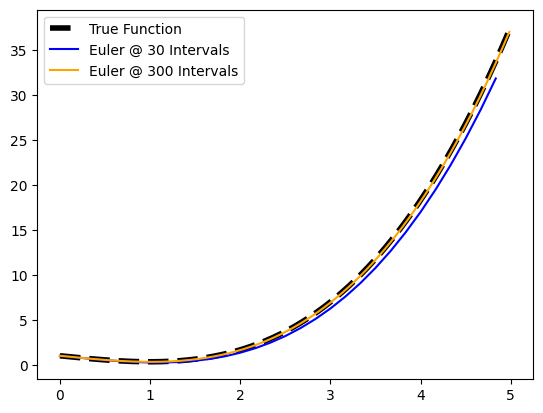

In [41]:
def ODE1(x, y, t=False):
    if t: 
        return (x**3)/3 - x + 1
    else:
        return x**2 - 1
    
def ODE2(x, y, t=False):
    if t: 
        return 2*np.exp((-3/2)*(x**2-1))
    else:  
        return -3*x*y

def standardEuler(df, a, b, start, n):
    # df: differential equation 
    # [a,b] integration bounds 
    # n - # of intervals 
    # start - initial value 

    h = (b-a)/n
    xlist = np.linspace(a,b,n+1)
    ylist = [start]

    for i in range(n-1): 
        yold = ylist[i]
        ynew = yold + h*df(xlist[i], ylist[i])
        ylist.append(ynew)
    
    return (xlist[:-1], ylist)

def avgEuler(df, a, b, start, n):
    # df: differential equation 
    # [a,b] integration bounds 
    # n - # of intervals 
    # start - initial value 

    h = (b-a)/n
    xlist = np.linspace(a,b,n+1)

    


    return 
ODE1xlist = np.linspace(0,5,500)
ODE1Real = ODE1(ODE1xlist, 0, True)

ODE1_30iter = standardEuler(ODE1, 0, 5, 1, 30) 
ODE1_300iter = standardEuler(ODE1, 0, 5, 1, 300) 

plt.plot(ODE1xlist, ODE1Real, label = 'True Function', linewidth = 4, linestyle = '--', c = 'k')
plt.plot(ODE1_30iter[0], ODE1_30iter[1], label = 'Euler @ 30 Intervals ', c = 'b')
plt.plot(ODE1_300iter[0], ODE1_300iter[1], label = 'Euler @ 300 Intervals', c = 'orange')

plt.legend()

# Plot All Solutions for 30 Intervals Separate from 300 Intervals (Same for Error)


In [38]:
a = 0
b = 5
n = 30 

h = (b-a)/n 
xlist = np.linspace(a,b,n+1)

print(h)
xlist

0.16666666666666666


array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
       0.83333333, 1.        , 1.16666667, 1.33333333, 1.5       ,
       1.66666667, 1.83333333, 2.        , 2.16666667, 2.33333333,
       2.5       , 2.66666667, 2.83333333, 3.        , 3.16666667,
       3.33333333, 3.5       , 3.66666667, 3.83333333, 4.        ,
       4.16666667, 4.33333333, 4.5       , 4.66666667, 4.83333333,
       5.        ])